In [50]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten
import matplotlib.pyplot as plt
import random
from tensorflow import keras

## Load DataSet

In [29]:
#data = pd.read_csv('input.csv')
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train=np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test=np.loadtxt('labels_test.csv', delimiter=',')


 # Rechaping pour le CNN input 

In [30]:
X_train =X_train.reshape(len(X_train),100,100,3)
#Format : (nombre d'échantillons, hauteur, largeur, canaux) 3 trois couche de couleur rouge bleu vert
Y_train =Y_train.reshape(len(Y_train),1)

X_test =X_test.reshape(len(X_test),100,100,3)
Y_test =Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

#normaliser les données pour facilité l'entrainement du model 


In [31]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of X_test",Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of X_test (400, 1)


In [34]:
len(X_train)

2000

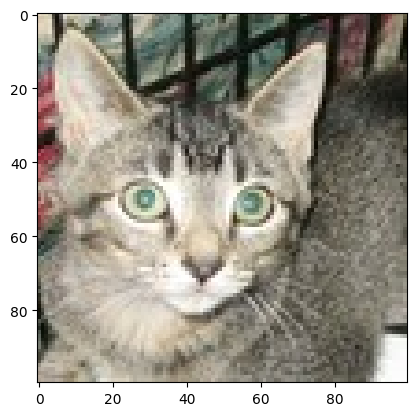

In [36]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

 # Model training

In [45]:
#crée un modele séquenciel
#Conv2D on précise combien de filtre en veut  , (3,3)size of filter
#focntion d'activation j'ai choisi relu si l'entre est positif la sortie et vise versa
#input_shape=(100,100,3) shape of first layer
model = Sequential([
    # Couche de convolution avec 32 filtres, taille du noyau (3,3), fonction d'activation ReLU,
    # et spécification de la forme de l'entrée (100x100 images avec 3 canaux de couleur)
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    
    # Couche de max pooling avec fenêtre (2,2) pour réduire la dimension spatiale et garder les informations les plus importante
    MaxPooling2D((2, 2)),
    
    # Deuxième couche de convolution avec 32 filtres, taille du noyau (3,3) et fonction d'activation ReLU
    Conv2D(32, (3, 3), activation='relu'),
    
    # Deuxième couche de max pooling pour réduire davantage la dimension spatiale
    MaxPooling2D((2, 2)),
    
    # Couche Flatten pour transformer les sorties 2D en vecteur 1D
    Flatten(),#le faite d'avoie en résultat un seule vecteur est très important pour la classification
    
    # Couche dense avec 64 neurones et fonction d'activation ReLU
    Dense(64, activation='relu'),
    
    # Couche de sortie avec 1 neurone et fonction d'activation sigmoid (classification binaire)
    Dense(1, activation='sigmoid')
])


In [52]:

#compile model
opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy' ,optimizer =opt,metrics= ['accuracy'])

In [53]:
#traning data 
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 10s 297ms/step - loss: 0.6952 - accuracy: 0.5030
Epoch 2/5
32/32 [==============================] - 8s 254ms/step - loss: 0.6909 - accuracy: 0.5415
Epoch 3/5
32/32 [==============================] - 8s 254ms/step - loss: 0.6893 - accuracy: 0.5510
Epoch 4/5
32/32 [==============================] - 8s 248ms/step - loss: 0.6885 - accuracy: 0.5690
Epoch 5/5
32/32 [==============================] - 9s 295ms/step - loss: 0.6881 - accuracy: 0.5570


In [55]:
#evaluation du model
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 39ms/step - loss: 0.6860 - accuracy: 0.5575


[0.685960054397583, 0.5575000047683716]

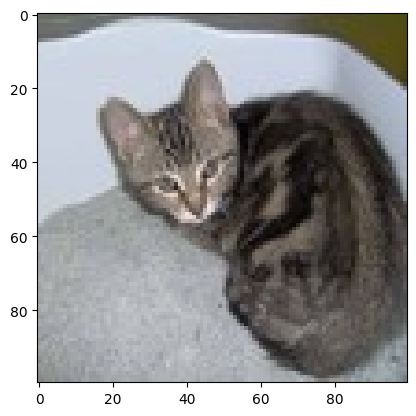

1/1 [==============================] - 0s 24ms/step
[[0.49122676]]
c'est un chien


In [63]:
indx2=random.randint(0,len(Y_test))
plt.imshow(X_test[indx2,:])
plt.show()
Y_pred=model.predict(X_test[indx2,:].reshape(1,100,100,3))
print(Y_pred) 

if Y_pred > 0.5 :
    print("c'est une chat")
else:
    print("c'est une chien")